# Logistic regression via Fisher scoring / the Newton-Raphson algorithm

We want to maximize the log-likelihood for a Bernoulli random variable $y \in \{0, 1\}$ with $N$ independent observations, $l(\theta) = \sum_{i=1}^N y^{(i)} log (h_\theta(x^{(i)}) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}))$. 
The updates will be $\theta := \theta + H^{-1} \nabla_\theta l(\theta)$, where $H = - \sum_{i=1}^N x_i x_i^T g(\theta^T x_i)(1 - g(\theta^T x_i)$, a Hessian with $H_{i j} = \dfrac{\partial^2 l(\theta)}{\partial \theta_i \partial \theta_j}$, and $\nabla_\theta l(\theta) = \sum_{i=1}^N x_i (y_i - g(\theta^T x_i))$.

These quantities can be written in matrix form as $H = - \pmb{X^T W X}$ and $\nabla_\theta l(\theta) = \pmb{X^T} (y-p)$, where $\pmb{W}$ is an $N$ by $N$ diagonal matrix of weights where element $i$ is $g(\theta^T x_i) (1 - g(\theta^T x_i))$, and $p$ is a vector of length $N$ with $p_i = g(\theta^T, x_i)$. We are numerically finding the point at which the derivative of the log-likelihood function is zero.

In [87]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import logistic
from scipy.special import expit
plt.style.use('ggplot')

def sim_reg(N, M):
    intercept = np.repeat(1, N)
    if M > 1:
        x = np.random.rand(N, M - 1)
        X = np.column_stack((intercept, x))
    else:
        X = intercept
    beta = np.random.normal(0, 2, M)
    h_theta = expit(np.dot(X, beta))
    y = np.random.binomial(1, h_theta, N)
    return {'beta':beta, 'y':y, 'X':X}

M = 5
N = 5000

out = sim_reg(N, M)

In [88]:
def calc_gradient(y, X, theta):
    p = expit(np.dot(X, theta))
    return np.dot(np.transpose(X),(y - p))

def calc_hessian(y, X, theta):
    g_theta = expit(np.dot(X, theta))
    W = np.diag(g_theta * (1. - g_theta))
    H = - np.dot(X.T, np.dot(W, X))
    return H

def update_theta(theta_old, y, X):
    # calc gradient
    hessian = calc_hessian(y, X, theta_old)
    inv_hessian = np.linalg.inv(hessian)
    gradient = calc_gradient(y, X, theta_old)
    new_theta = theta_old - np.dot(inv_hessian, gradient)
    return new_theta

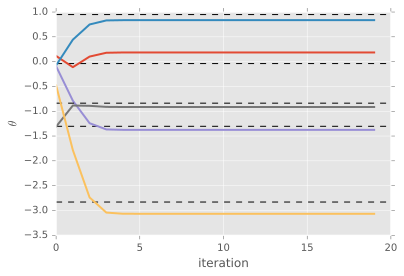

In [89]:
# set up object to track theta updates
it = 20

theta_out = np.empty([it, M])
theta_out[0, :] = np.random.normal(0, 1, M)

for i in range(1, it):
    theta_out[i, :] = update_theta(theta_out[i-1, :], out['y'], out['X'])

for i in range(0, M):
    plt.axhline(out['beta'][i], ls='--', color='black')
    plt.plot(range(0, it), theta_out[:, i], lw=2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')